<a href="https://colab.research.google.com/github/DataWitchcraft/python4sci/blob/main/11_Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualization and Pandas

While there is a consensus on libraries for common spreadsheet data processing, and we usually reach for pandas when exploring small to medium-sized data, there is a plethora of libraries for data visualization. Each has its advantages and disadvantages.

**matplotlib** - This is probably the most widely used and in many ways the most flexible library. It is the default choice if you need static plots that will work almost anywhere. The considerable flexibility is balanced by the sometimes not-so-intuitive function and argument names. Pandas uses it internally (which is why you don't need to familiarize yourself with it in such detail). See https://matplotlib.org/.

**seaborn** - This library aims to help with statistical graphs in particular. It builds on matplotlib, but overlays a "human" face on top of it. We will work with it to visualize more complex relationships between multiple variables. See https://seaborn.pydata.org/. You can find many visualization examples at https://seaborn.pydata.org/examples/index.html

**Plotly** (especially its subset **plotly.express**) - This is the library to reach for if you want to add interactivity to your visualization. It is, of course, difficult to print on paper, but especially when working in a Jupyter notebook, it allows you to explore everything much faster. See https://plot.ly/python/.

For those interested in a more detailed explanation, we recommend watching the (now somewhat older) video by Jake Vanderplas: Python Visualizations' Landscape (https://www.youtube.com/watch?v=FytuB8nFHPQ), which summarizes the basic features of each library.

In [1]:
import pandas as pd

In [2]:
# download files
import requests
from pathlib import Path

datapath = Path('./data')
datapath.mkdir(exist_ok=True)

to_download = [
    'https://raw.githubusercontent.com/DataWitchcraft/python4sci/main/data/cze.csv',
    'https://raw.githubusercontent.com/DataWitchcraft/python4sci/main/data/countries.csv',
    'https://raw.githubusercontent.com/DataWitchcraft/python4sci/main/data/surveys.csv',
    'https://raw.githubusercontent.com/DataWitchcraft/python4sci/main/data/species.csv',
]
    
for link in to_download:
    name = link.rsplit("/")[-1]
    filepath = datapath / name
    if not filepath.exists():
        r = requests.get(link)
        filepath.write_bytes(r.content)
        print(f'File {name} downloaded.')
    else:
        print(f'File {name} already exists.')
        

File cze.csv downloaded.
File countries.csv downloaded.
File surveys.csv downloaded.
File species.csv downloaded.


In [3]:
countries = pd.read_csv("data/countries.csv").set_index("name")
countries.head()

,iso,world_6region,world_4region,income_groups,is_eu,is_oecd,eu_accession,year,area,population,alcohol_adults,bmi_men,bmi_women,car_deaths_per_100000_people,calories_per_day,infant_mortality,life_expectancy,life_expectancy_female,life_expectancy_male,un_accession
name,,,,,,,,,,,,,,,,,,,,
Afghanistan,AFG,south_asia,asia,low_income,False,False,NaN,2018,652860.0,34500000.0,0.03,20.62,21.07,NaN,2090.0,66.3,58.69,65.812,63.101,1946-11-19
Albania,ALB,europe_central_asia,europe,upper_middle_income,False,False,NaN,2018,28750.0,3238000.0,7.29,26.45,25.66,5.978,3193.0,12.5,78.01,80.737,76.693,1955-12-14
Algeria,DZA,middle_east_north_africa,africa,upper_middle_income,False,False,NaN,2018,2381740.0,36980000.0,0.69,24.60,26.37,NaN,3296.0,21.9,77.86,77.784,75.279,1962-10-08
Andorra,AND,europe_central_asia,europe,high_income,False,False,NaN,2017,470.0,88910.0,10.17,27.63,26.43,NaN,NaN,2.1,82.55,NaN,NaN,1993-07-28
Angola,AGO,sub_saharan_africa,africa,upper_middle_income,False,False,NaN,2018,1246700.0,20710000.0,5.57,22.25,23.48,NaN,2473.0,96.0,65.19,64.939,59.213,1976-12-01


In [4]:
czech = pd.read_csv("data/cze.csv")
czech.iloc[::5]   # Each fifth year

,year,population,alcohol_adults,bmi_men,bmi_women,car_deaths_per_100000_people,calories_per_day,infant_mortality,life_expectancy,life_expectancy_female,life_expectancy_male
0,1980,10260000.0,NaN,26.31,26.80,NaN,NaN,17.0,70.60,74.289,67.153
5,1985,10300000.0,NaN,26.54,26.77,NaN,NaN,15.1,71.13,74.716,67.446
10,1990,10300000.0,NaN,26.77,26.66,NaN,NaN,12.7,71.82,75.619,68.208
15,1995,10320000.0,NaN,26.98,26.45,7.837,3209.0,8.8,73.34,76.923,69.731
20,2000,10240000.0,NaN,27.28,26.45,6.600,3079.0,5.6,74.99,78.231,71.500
25,2005,10220000.0,16.45,27.63,26.48,6.123,3318.0,4.4,76.19,79.442,73.013
30,2010,10490000.0,NaN,NaN,NaN,NaN,3276.0,3.4,77.47,80.672,74.511


## Bar chart 
The easiest chart you can create is a bar chart. You can display the bars next to each other in order of height according to the property you are interested in. It shows the values of one variable without statistically processing them in any way or comparing them to another variable.

In pandas, the plotting functions are accessed using the so-called `.plot` accessor. This is a hybrid object that can be called as a method (`Series.plot()` - it uses the default plot type), or its own methods can be referenced using an additional dot to draw different types of plots. For pedagogical reasons, we want to start from a bar chart, which is not the default, so we call `Series.plot.bar()`.

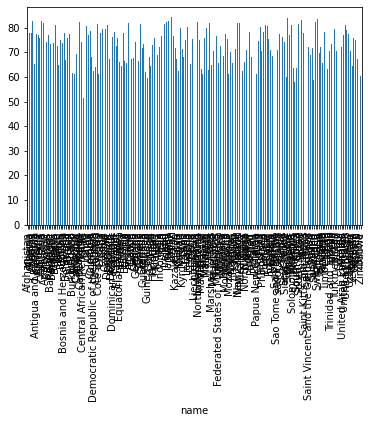

In [6]:
countries["life_expectancy"].plot.bar();

Ugh, that doesn't look very clear. Let's try the same thing, but for European Union countries. 

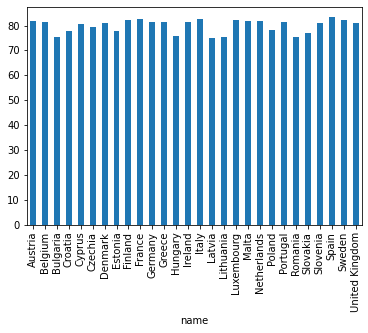

In [7]:
eu_countries = countries[countries["is_eu"]]     
x = eu_countries["life_expectancy"].plot.bar()

In [8]:
type(x)

matplotlib.axes._subplots.AxesSubplot

💡 The graphs are displayed directly in the notebook, but besides them we get back some object of a strange class `matplotlib.axes._subplots.AxesSubplot` (as the name suggests, it is part of the matplotlib library). This represents the rectangle into which the plot is drawn, along with the axis labels and other elements. The methods of this object can be used to further tweak the graphic, but we will avoid that this time, because most of the important things can be specified using the arguments of the corresponding plot method.

💡 If you want to hide the value output on the last line of a notebook cell (typical for charts), you can put a semicolon at the end of the cell.

Do people live longer in the UK or in Germany? That's not exactly easy to compare. What if we sort the values and then display them?

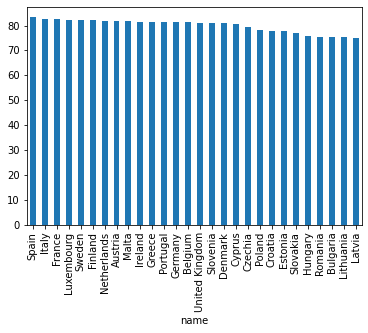

In [9]:
eu_countries["life_expectancy"].sort_values(ascending=False).plot.bar();

We can also try the horizontal bar chart:

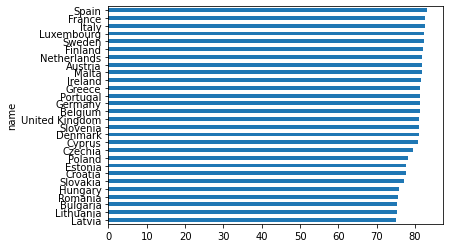

In [10]:
eu_countries["life_expectancy"].sort_values().plot.barh();

The plotting functions offer a lot of parameters that are not well documented and are quite closely tied to how the `matplotlib` library works. We'll go through them as they come in handy. Our graph could use a bit of a boost in height. Also, the values aren't too far apart, and setting a custom range on the x-axis would help highlight the differences. Plus we'll add a bit of formatting.

- `figsize` specifies the size of the chart as a pair (tuple) of sizes in inches in order (width, height). To choose the ideal value, just experiment in your notebook.
- `xlim` specifies a range of values on the x-axis in like pairs (minimum, maximum)
- `color` specifies the fill color: this can be a name or a hexadecimal RGB notation
edgecolor tells what color the columns should be bordered with
- `title` sets the title of the whole chart

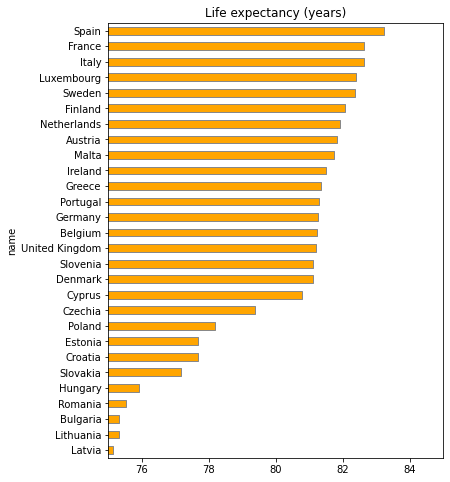

In [11]:
eu_countries["life_expectancy"].sort_values().plot.barh(
    figsize=(6, 8),
    xlim=(75, 85),
    color="orange",
    edgecolor="#888888",   # gray
    title="Life expectancy (years)"
);

💡 Starting bar charts (and many other charts as well) from anywhere other than zero will help you notice even subtle differences. It's definitely a good idea in the exploratory phase. However, when presenting the results, highlighted differences can confuse the audience and give the impression that an effect is much stronger than it really is. The manipulation effect is stronger the less intuitive the data presented. In this case, few people would believe that people in Spain live 60 times longer than in Latvia, because this does not correspond to common expectations, but even so, at first sight the situation looks very dramatic (we leave it to you to judge whether the difference between 75 and 83, or about 10%, is huge or not). 

We can display multiple variables at once if we create it not through Series but through DataFrame. Just add multiple columns instead of one column.

In this case, we'll look at how long men and women live. We'll choose gender-stereotyped colors, but you can of course customize them as you like.

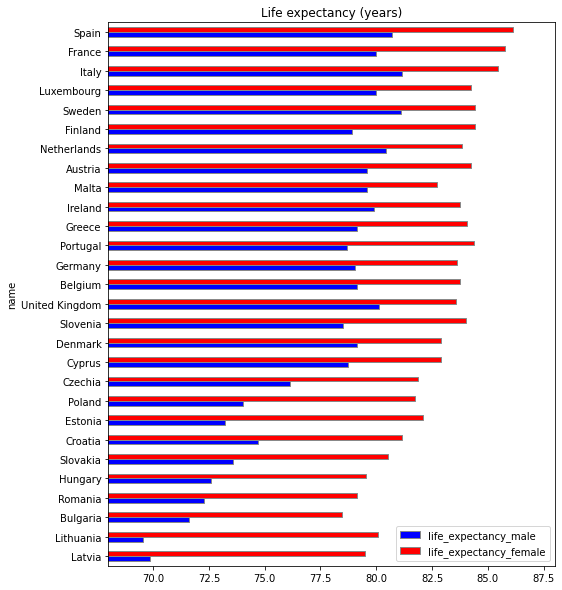

In [12]:
eu_countries.sort_values("life_expectancy")[["life_expectancy_male", "life_expectancy_female"]].plot.barh(
    figsize=(8, 10),
    xlim=(68, 88),               # axis limits
    color=["blue", "red"],       # two different colors for two columns
    edgecolor="#888888",         
    title="Life expectancy (years)"
);

**Your turn:**

1) Draw a graph comparing the infant mortality rates in each country in the Americas region. Name the graph "Newborn Mortality (number per 1000 babies)" and rank the countries from highest to lowest. Which country has the highest mortality rate and which country has the lowest?

2) Create a horizontal bar chart showing the BMI (body mass index) of men and the BMI of women in the lowest income (low_income) countries.

 - Since South Sudan does not report BMI values, omit this country.
 - Rank the countries by male BMI from highest to lowest.
 - Name the plot "Difference between male and female BMI in the lowest income countries".
 - Choose a chart size of (12,12) or another value that you find clear.
 - Show the BMI values (range of values on the x-axis) from 18 to 26.
 - Fill the male column in blue, the female column in pink.    
 - Use grey for column borders.

## Scatter plot
A scatter plot is the simplest way to compare two different variables. 

We call the `plot.scatter` method of our table and supply it with the names of the columns to be used for the coordinates as `x` and `y` arguments:

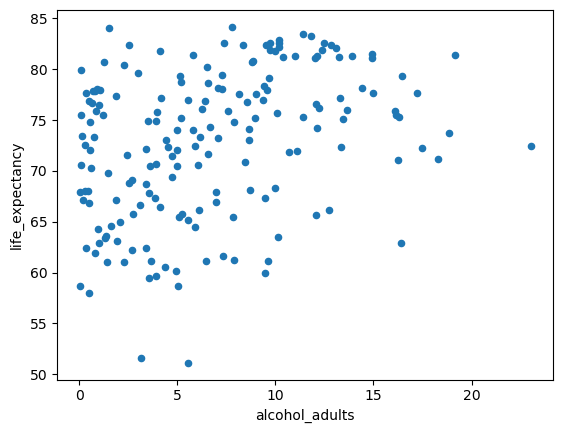

In [ ]:
countries.plot.scatter(
    x="alcohol_adults",
    y="life_expectancy",
);

💡 You also can't help thinking that the more people drink, the longer they live? 🤯

Even without mathematical rigor, we'll find out what's going on here. Let's try colouring each region of the world with different colors. We'll use the `map` method that replaces the values in `Series` according to a dictionary. The `world_4region` column contains exactly 4 different regions ("continents"), so a very simple dictionary will suffice.

We'll show a few more arguments:

- `s` expresses the size (or approximately the area) of the symbol in points (can be a single value or a column/array of values)
- `marker` indicates the shape of the symbol, usually using a single letter, see list of options
- `alpha` represents the opacity of the symbol (0 = completely transparent and not visible, 1 = opaque, intense, hides everything "behind"). Useful when you have a large number of symbols in a chart and want to allow them to overlap.

In [ ]:
region_colors = {
    "europe": "blue",
    "asia": "yellow",
    "africa": "black",
    "americas": "red"
}
color = countries["world_4region"].map(region_colors)  
color

name
Afghanistan    yellow
Albania          blue
Algeria         black
Andorra          blue
Angola          black
                ...  
Venezuela         red
Vietnam        yellow
Yemen          yellow
Zambia          black
Zimbabwe        black
Name: world_4region, Length: 193, dtype: object

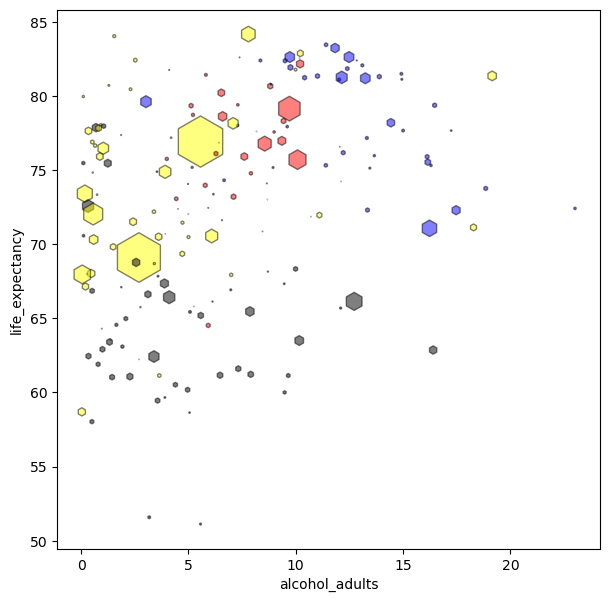

In [ ]:
countries.plot.scatter(
    figsize=(7, 7),
    x="alcohol_adults",
    y="life_expectancy",
    color=color,  # note: we are not using name of the column but the whole array of values
    marker="h",        # (h)exagon   
    s=countries["population"] / 1e6,   # marker size
    edgecolor="black", # border color
    alpha=0.5          
);

So it seems that in Asia, in general, people are little drinking, in the Americas they are moderately drinking, in Africa people have lower life expectancy, but at first glance we don't see any trend in these groups of countries.

It is often the case that values are difficult to compare. For example, in terms of size or population, there are countries in the world that are small and countries that are gigantic. The differences are orders of magnitude:

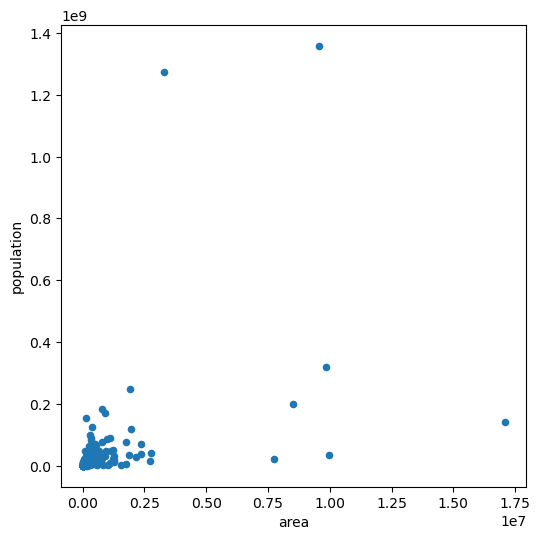

In [ ]:
countries.plot.scatter(
    x="area",
    y="population",
    figsize=(6,6)
);

In such case, it is useful to abandon thelinear scale. Instead, we will use the logarithmic scale. The arguments `logx` and `logy` (according to the respective axis) are used for this purpose.

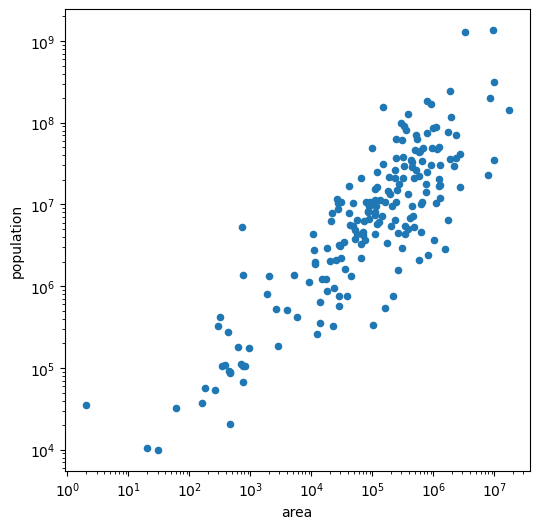

In [ ]:
ax = countries.plot.scatter(
    x="area",
    y="population",
    figsize=(6, 6),
    logx=True,
    logy=True,
);

**Your turn:**

In a scatter plot, compare the BMI of men with the amount of calories consumed per day.

- Think of a suitable title for the graph.
- Choose the size of the graph (8.8) or another value that you find clear.
- Set the shape of the symbol to a star.
- The color of the symbol is green.
- Marker size 30.

## Line plot
This kind of graph is particularly meaningful when a variable evolves continuously in relation to another variable. Time series are a great example of this (either for the relationship between time and a variable, or two variables that both evolve at the same time).

You create a line graph using the `plot.line` method. Coincidentally, that's also the default graph type for pandas, so you can actually just call `plot` as a method. Its parameters are similar to a scatter plot.

For example, let's look at the evolution of life expectancy in Czechia since the early 1980s:

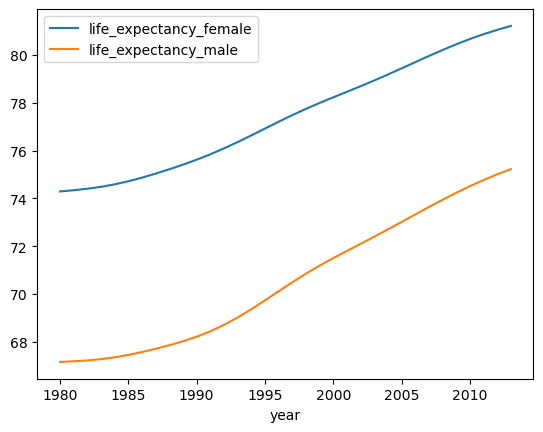

In [ ]:
czech.plot(x="year", y=["life_expectancy_female", "life_expectancy_male"]);

There are several arguments for line plots:

- `lw` gives the thickness of the line in points
- `style` is the style of the line: "-" is solid, ":" is dotted, "--" is dashed, "-." is ruled
- `markersize` is the size of the symbol that can optionally accompany the line

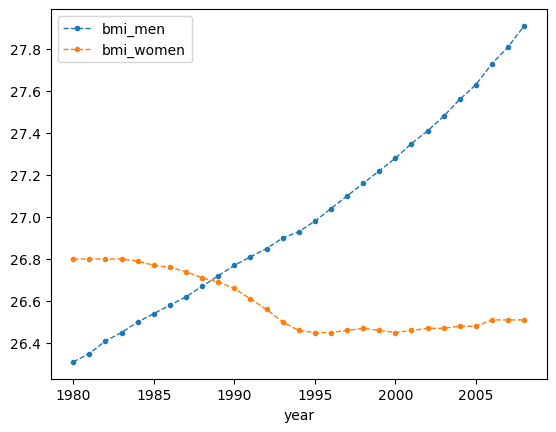

In [ ]:
czech.plot.line(
    x="year",
    y=["bmi_men", "bmi_women"],
    lw=1,
    style="--",
    marker="o",       # Circles for values
    markersize=3);

**Your turn**
Create a graph with the population development in the Czech Republic between 1980 and 2013.

- The name of the graph and its size is up to you.
- Set the values on the y-axis (population) from 10 million to 11 million.
- Draw the line in green, with a thickness of 2 and use round points for each value (marker)


## Saving images
So far, all our graphs have been rendered within the Jupyter notebook. Many times this is enough, plus you can almost always use the context menu to save the image manually from the browser. However, it is also good to be able to automate this step (for use in a frequently used cell, in a loop, or in a command line, for example).

Unfortunately, you have to do it a bit indirectly - first you get an object of type `Axis` as a result of the drawing function, use it to get an object of type `Figure` (this one includes the whole graphic area, not "just" one graph and the axes), and only then it offers the `savefig` (https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.figure.Figure.html#matplotlib.figure.Figure.savefig) method:

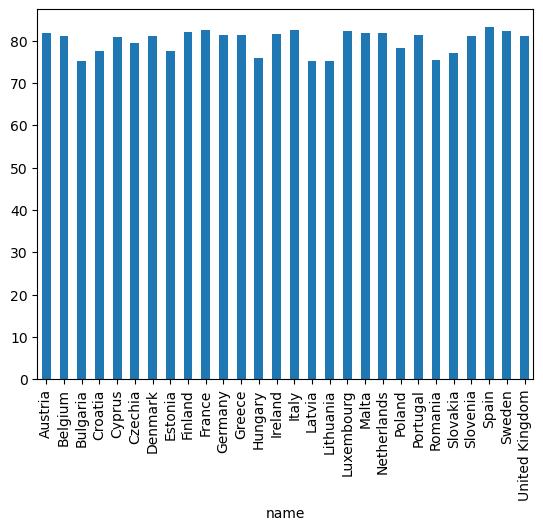

In [ ]:
axes = eu_countries["life_expectancy"].plot.bar()
figure = axes.get_figure()
figure.savefig("expectancy.png", dpi=100)

# Seaborn

Seaborn is particularly suitable for more complex statistical plots. But it also contains custom wrappers for `matplotlib`

In [ ]:
import seaborn as sns

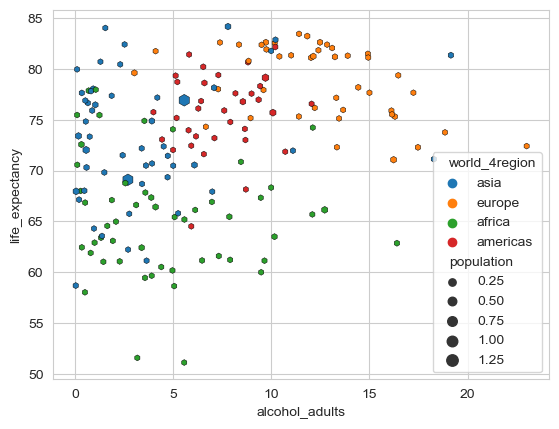

In [ ]:
sns.set_style("whitegrid") # change theme 
sns.scatterplot(
    data=countries,          # DataFrame
    x="alcohol_adults",
    y="life_expectancy",     # column names
    size="population",       # size according to a column (not really suitable here)
    hue="world_4region",     # colors according to a category
    edgecolor="black",       # This is passed to matplotlib
    marker="h", 
);

If you want to display the relationships of all pairs of different numeric variables at the same time, the `pairplot` function can be useful to draw a square grid with histograms on the diagonal and two-dimensional graphs (scatter plots by default) off the diagonal:

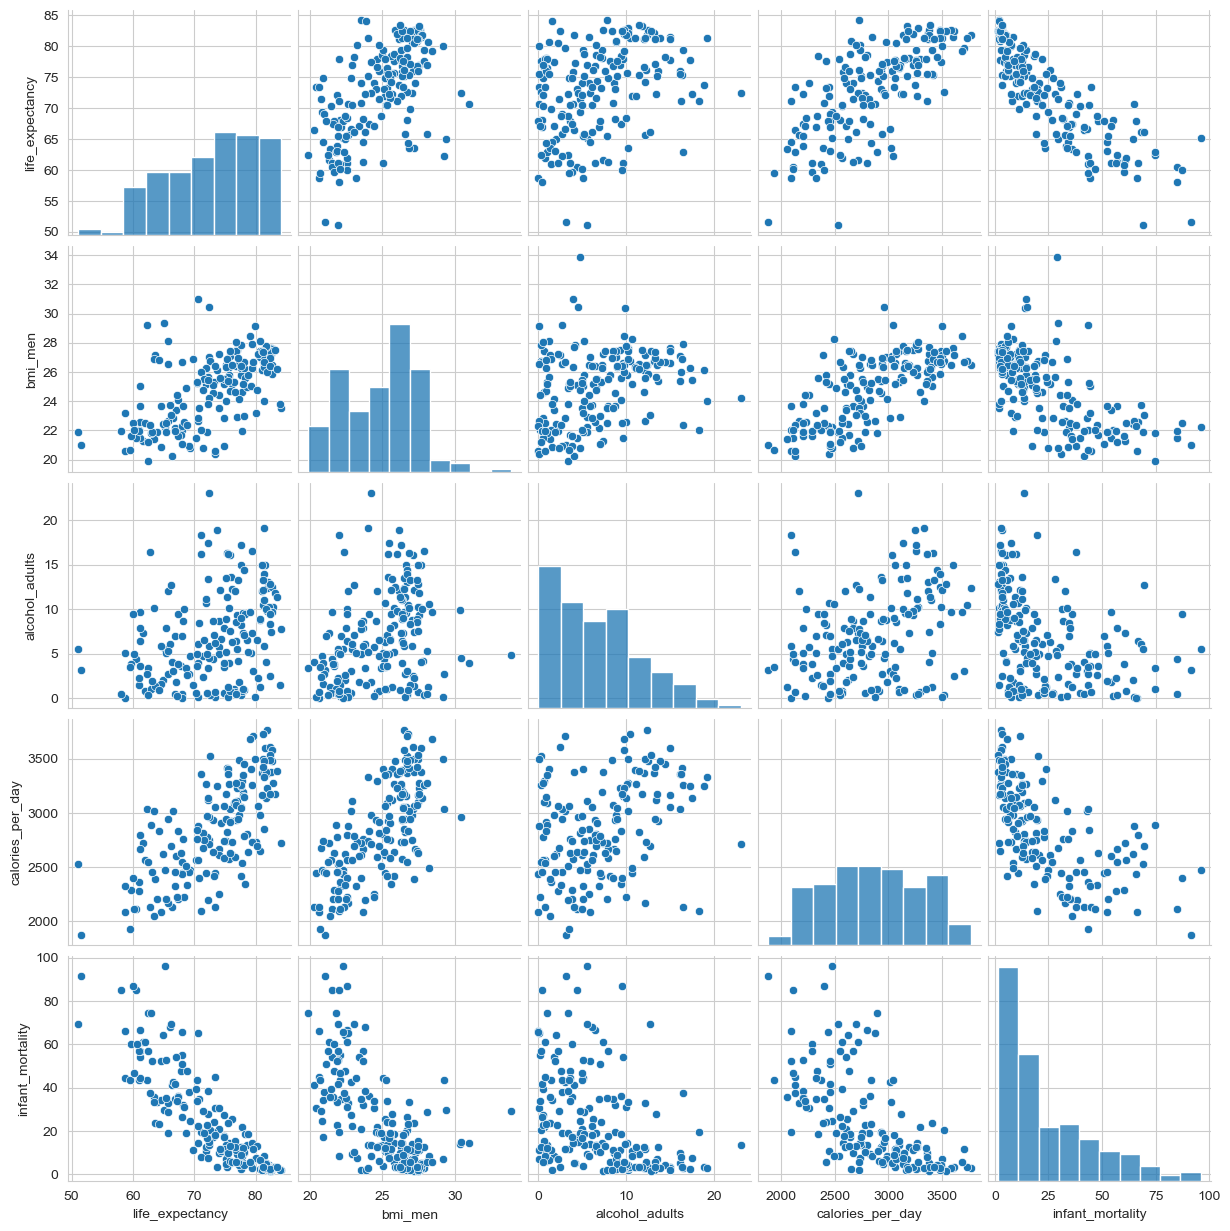

In [ ]:
sns.pairplot(
    countries[['life_expectancy', 
           'bmi_men', 
           'alcohol_adults', 
           'calories_per_day', 
           'infant_mortality']]
);

When examining the relationships between categorical and numerical variables, we are actually looking at a set of numerical variables, evaluated for each value of the categorical variable separately. 

Now we are going back to the animal dataset, we were using during the last lesson, and visualize weights of a few selected animal species.

In [ ]:
surveys = pd.read_csv("data/surveys.csv")
surveys_subset = surveys[surveys['species_id'].isin(['DS', 'SH', 'SO', 'SF', 'PB'])]

### Boxplot
The "box" (rectangle) in the defines the area between the first and third quartiles (Q1 and Q3), the dividing line corresponds to the median, and the "whiskers" indicate the range of the data. By default, it is the last point that is less/greater than 1.5 times the "inter-quartile range" IQR, `IQR = Q3 - Q1`. This range is usually considered as the limit for outliers, which are then marked as symbols (diamonds in our case) in the boxplot.

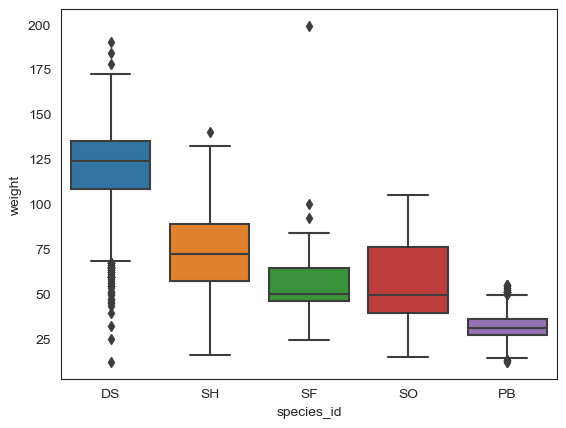

In [ ]:
sns.set_style("white") 
sns.boxplot(data=surveys_subset, 
    x="species_id",
    y="weight"
);

### Strip plot
In addition, the "strip plot" (`stripplot` function) represents each value with a dot, planted in a column above the corresponding category (at the correct height, the horizontal location carries no information):

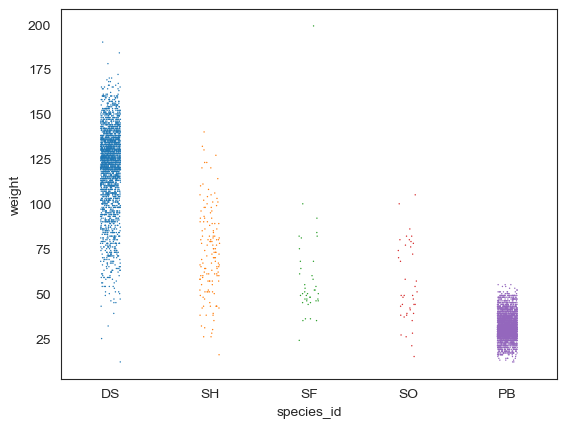

In [ ]:
sns.stripplot(
    data=surveys_subset, 
    x="species_id",
    y="weight",
    s=1,
);

###  Violin plot
The violin plot plays a very similar role to the box plot, offering a miniature probability density curve instead of squares. You plot it with the `violinplot` function:

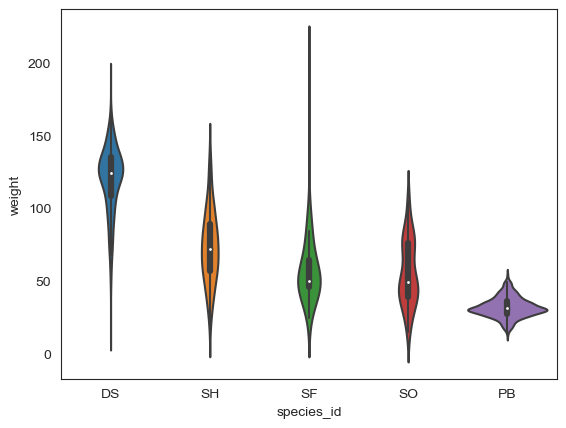

In [ ]:
sns.violinplot(
    data=surveys_subset, 
    x="species_id",
    y="weight",
);

### Catplot
Catplot is a function that unifies multiple data visualization techniques, including boxplots, strip plots and violin plots:

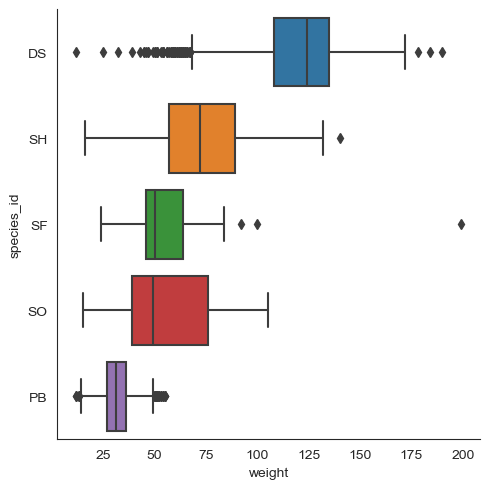

In [ ]:
sns.catplot(
    data=surveys_subset, 
    x="weight",
    y="species_id",
    kind="box"
);

### Dogplot
And last, but not least... let's draw a dogplot

In [ ]:
sns.dogplot(
    data=surveys_subset, 
    x="weight",
    y="species_id",
);